## Experiment Setup

- Wofs LS5, full history query
- Tile -9 -18, chunk (8,2)
- Image Properties
    - 4000x4000 single band uint8
    - Chunk size 256x256
    - DEFLATE lvl 9, no differencing
- 1416 time slices
- Access one chunk from each time slice
- M5.xlarge instance 4 cores 16G ram
- Chunk with largest compressed size was chosen
- S3 bucket and EC2 both in Sydney region
- http://dea-public-data.s3-website-ap-southeast-2.amazonaws.com/?prefix=bench-data/LS5_TM_WATER/-9_-18/

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pickle
from types import SimpleNamespace
from utils import bench

## Load data

In [2]:
import glob
files = sorted(glob.glob('./results/M5XL_ZIP_-9_-18*_001.pickle'))
dd = [pickle.load(open(file, 'rb')) for file in files]

## Scaling with more threads

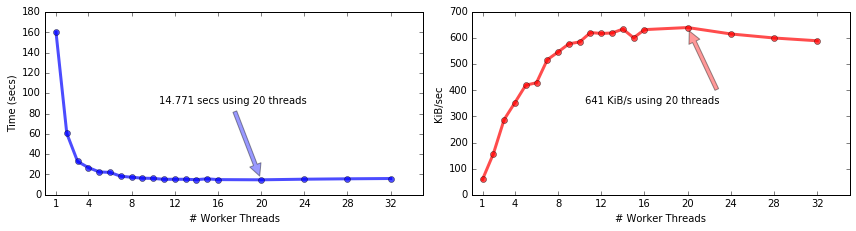

In [3]:
fig = plt.figure(figsize=(12,6))
best_idx = bench.plot_stats_results(dd, fig=fig)

## In depth stats for single threaded case

-------------------------------------------------------------
Tile: (-9,-18)@8_2#1
   - blocks  : 256x256@uint8
   - nthreads: 1
-------------------------------------------------------------

Files read             : 1416
Total data bytes       : 9,687,887
  (excluding headers)
Bytes per chunk        : 6842 [5042..15434] bytes

Time:
 per tile:
  - total   113.013 [50.3.....1438.3] ms
  - open     89.158 [35.9.....1423.3] ms 80.1%
  - read     23.855 [10.7.....1336.5] ms 19.9%

 total_cpu: 160.00 sec
 walltime : 160.22 sec
-------------------------------------------------------------


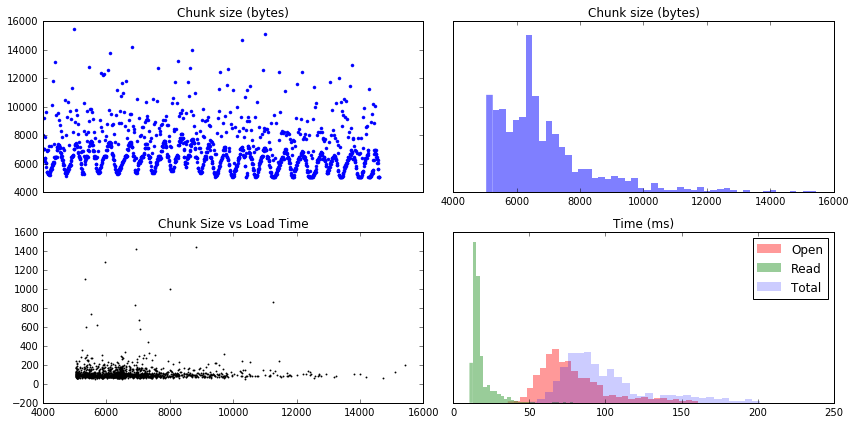

In [4]:
print(bench.gen_stats_report(dd[0]))
fig = plt.figure(figsize=(12,6))
bench.plot_results(dd[0].stats, fig=fig);

## Analysis

- Open costs dominate (80%) of total processing time
- Scales well with more processing workers
  - Limited by latency not throughput
  - Seems like having more than 3 threads per core generates very little extra gain, and more than 4 is counter-productive
